

## **Tema:** Clusterização de clientes por perfil de compra

## Autor: Fillipe de Almeida Andrade 


## Objetivo



> O objetivo principal deste projeto é fazer o agrupamento dos clientes de uma determinada loja de um banco de dados no kaggle através do algoritmo não supervisionado Kmeans, sendo que o agrupamento deve estar coerente com o conceito dos grupos de crédito. Os grupos propostos por este trabalho são:


*   Pessoas com alta renda, mas gastam pouco (**Baixo Risco**)
*   Pessoas que estão na média de gasto e ganho (**Médio Risco**)
*   Pessoas que ganham muito e gastam muito (**Ideal**)
*   Pessoas que ganham pouco e gastam pouco (**Normal**)
*   Pessoas que ganham pouco e gastam muito (**Alto Risco**)



> A partir desses clusters será analisado se a IA obteve sucesso observando o gráfico resultante.






## Metodologia




> Nesta seção será mostrado os passos nescessários para construção da inteligência artificial



### Importando as Bibliotecas nescessárias para o projeto

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np


### Pegando a base de dados de clientes de um shopping, base disponivel no kaggle no seguinte link:



> https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python



In [ ]:
base = pd.read_csv('/content/Mall_Customers.csv', header = 0)
base

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Pegando os atributos essenciais para o problema



> Não foi escolhido o sexo e a idade, pois pode enviesar a IA por esses atributos que né indesejado para o modelo que deve se basear em crédito e o comportamento dos clientes em utilizar seus ganhos e como isso pode ser potencializado.



In [ ]:
X= base.iloc[:, [3,4]].values



### Análise da quantidade de clusters ideal para este tipo de problema e qual o significado de cada cluster no problema.



> WCSS é um indicador que mostra como cada cluster irá separar os dados, na escolha do cluster é sempre importante observar em qual valor haverá umm grande decrescimento, sendo então o valor ideal para o problema.



Text(0, 0.5, 'WCSS')

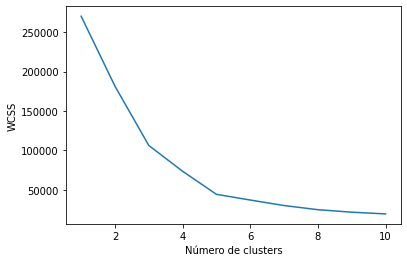

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

### Definição na quantidade de grupos



> Observando o gráfico é visto que o indicador WCSS descresce consideravelmento em 5 clusters, então na criação do modelo abaixo foi escolhido esse valor para o indicador. Por fim feita a previsão



In [ ]:
kmeans = KMeans(n_clusters = 5, random_state = 0)
previsoes = kmeans.fit_predict(X)

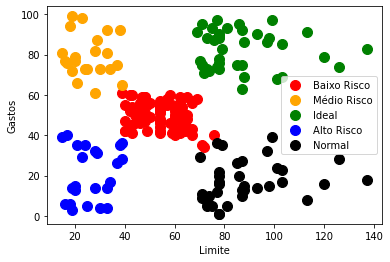

In [ ]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Baixo Risco')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'orange', label = 'Médio Risco')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Ideal')
plt.scatter(X[previsoes == 3, 0], X[previsoes == 3, 1], s = 100, c = 'blue', label = 'Alto Risco')
plt.scatter(X[previsoes == 4, 0], X[previsoes == 4, 1], s = 100, c = 'black', label = 'Normal')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()

## Resultados



> Olhando para o gráfico vemos que os grupos definidos nos objetivos foram aplicados na mtedologia, alcançando assim uma definição do grupo em que cada cliente pertence. E como deve ser ajustado o limite de cada grupo e incentivo a compras, visando uma maior taxa de vendas e incentivo a compras sem dívidas para os clientes.





> Observação geral da bae com as previsões



In [ ]:
lista_clientes = np.column_stack((base, previsoes))
lista_clientes = lista_clientes[lista_clientes[:,5].argsort()]

In [ ]:
lista_clientes

array([[200, 'Male', 30, 137, 83, 0],
       [172, 'Male', 28, 87, 75, 0],
       [170, 'Male', 32, 87, 63, 0],
       ...,
       [49, 'Female', 29, 40, 42, 2],
       [88, 'Female', 22, 57, 55, 2],
       [100, 'Male', 20, 61, 49, 2]], dtype=object)